# Milk Production Forecasting Time Series Analysis
The milk production has been a pillar for many countries. This staple has brought many nutrition to the rich and the poor in the nation. It has not only the rich and affordable for all source of nutrition but also helped the Thereforecountries economy in the times. Therefore, it is an reponsibility of experts and workers of the industry to keep the production working day and night to never let any child go empty stomach. For this task we're assigned, we have to create a time series model that accurately predicts the future of the production rate, to help experts take action carefully.

For this task, we will use several statistical methods and time series models to forecast the production and reduce any type wastage.

So, for starting we will have to import some important libraries.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

Now, let's have a clear view over our dataset.

In [2]:
dairy_prod= pd.read_csv('/content/monthly-milk-production-pounds-p.csv')

dairy_prod.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


AS we can see that, our data contains only 2 columns and the name of the of the column 2 is not easy to understand or remember for processing over the task. So to make it more understandable for everyone, we will first change the name of the column and check of there's any null values in the data. Afterwards, we will proceed with making our month column as our index with changing its data type to date_time data type.

In [3]:
# changing the name of the column
dairy_prod.rename(columns={'Monthly milk production: pounds per cow. Jan 62 ? Dec 75': 'Monthly Milk Production(pounds)'}, inplace=True)

Here, we changed the name of the 2nd column.

In [4]:
dairy_prod

,Month,Monthly Milk Production(pounds)
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


As we can see here we have one null value in the dataset. Now, we will eliminate the null rows from the dataset.

In [6]:
dairy_prod.isna().sum()

Month                              0
Monthly Milk Production(pounds)    1
dtype: int64

Now, we know we only one null value in the dataset and that is the last row. Therefore, we will drop that particular row from the dataset.

In [7]:
dairy_prod.drop(168, axis=0, inplace=True)

Now we will check the last row of the dataset.

In [8]:
dairy_prod.tail()

,Month,Monthly Milk Production(pounds)
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


As we can see here the null value has been removed from the data.

Therefore, now as we planned we will changed the index column with our Month column.

In [9]:
# changing the data type of  the col
dairy_prod['Month']=pd.to_datetime(dairy_prod['Month'])


dairy_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month                            168 non-null    datetime64[ns]
 1   Monthly Milk Production(pounds)  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [10]:
# setting the index column
dairy_prod.set_index('Month', inplace=True)

dairy_prod.head(2)

,Monthly Milk Production(pounds)
Month,
1962-01-01,589.0
1962-02-01,561.0


In [11]:
# now finally checking the shapec of the dataset

dairy_prod.shape

(168, 1)

Gathering the basic statistical Information from the dataset.

In [12]:
dairy_prod.describe()

,Monthly Milk Production(pounds)
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


Now, as we have made our data ready to work on. We will now plot some graphs from the raw dataset to see any possible information.

<Axes: xlabel='Month'>

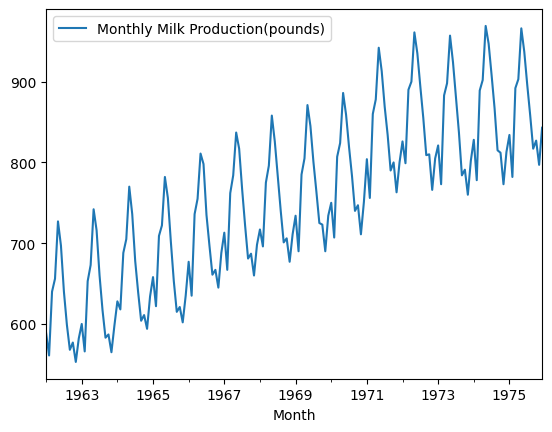

In [13]:
dairy_prod.plot()

As we can see in the plotting, there are several highs and lows in the data. Therefore, we will smooth the data with the help of moving average and then plot it to make it more understandable.

In [14]:
moving_avg_milk = dairy_prod.rolling(window=12).mean()

moving_avg_milk

,Monthly Milk Production(pounds)
Month,
1962-01-01,NaN
1962-02-01,NaN
1962-03-01,NaN
1962-04-01,NaN
1962-05-01,NaN
...,...
1975-08-01,856.750000
1975-09-01,856.916667
1975-10-01,858.166667


<Axes: xlabel='Month'>

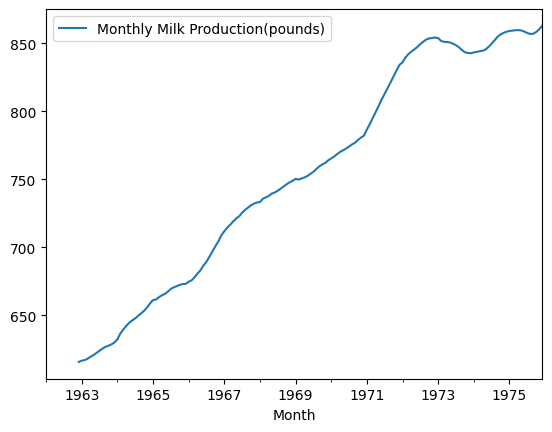

In [15]:
moving_avg_milk.plot()

The plot is showing a nice growth in the production.

<Axes: xlabel='Month'>

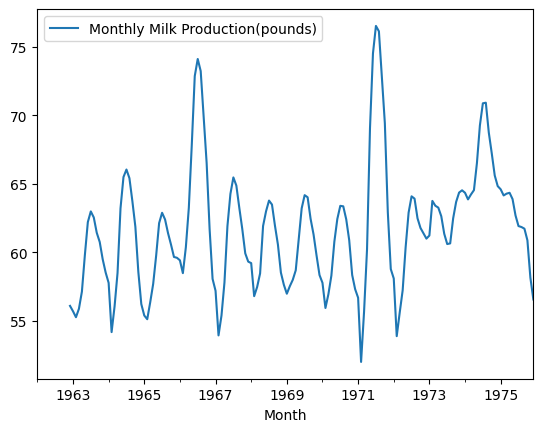

In [16]:
std_dev= dairy_prod.rolling(window=12).std()

std_dev.plot()

Now, we will combine the plots to see for the patterns.

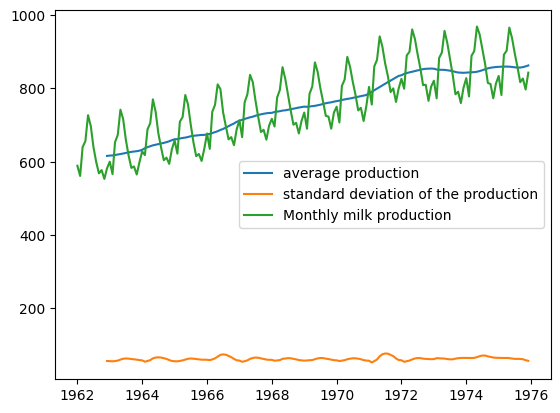

In [17]:
plt.plot(moving_avg_milk.index, moving_avg_milk.values, label='average production')
plt.plot(std_dev.index, std_dev.values, label='standard deviation of the production')
plt.plot(dairy_prod.index, dairy_prod.values, label= 'Monthly milk production')
plt.legend()
plt.show()

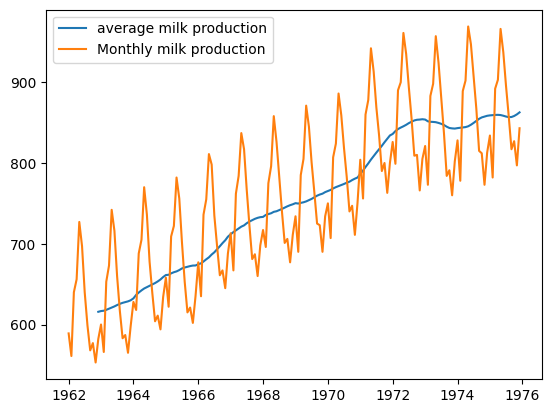

In [18]:
plt.plot(moving_avg_milk.index, moving_avg_milk.values, label='average milk production')
plt.plot(dairy_prod.index, dairy_prod.values, label='Monthly milk production')
plt.legend()
plt.show()

<ipython-input-19-5804563ffa88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dairy_prod['Monthly Milk Production(pounds)'])


<Axes: xlabel='Monthly Milk Production(pounds)', ylabel='Density'>

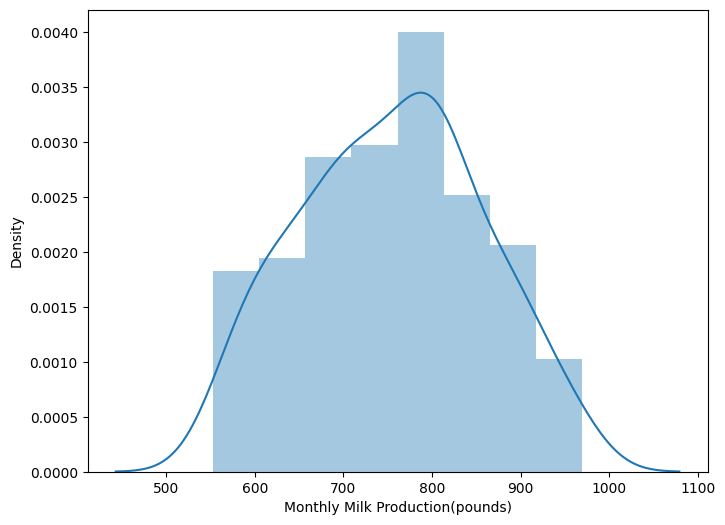

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(dairy_prod['Monthly Milk Production(pounds)'])

The above plot shows that the data is not normally distributed and is skewed.

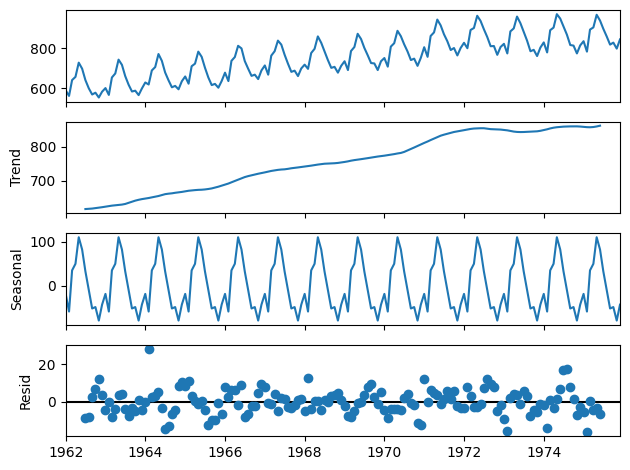

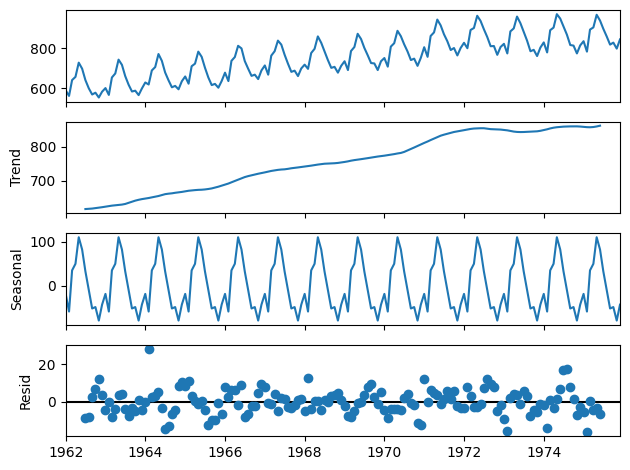

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(dairy_prod, model= 'Additive', period=12).plot()

So, we now know that data is not exactly normally distributed. So, our next strategy will be towards cheecking if our data is stationary or not. Now this step we will take the help of ADF test. In this step, we will assume two hypothesis that is our null hypethesis which tells us that our data is not stationary and our alternative hypothesis will tell us that our data is stationary.



In [21]:
# we will import adfuller library from statsmodels
from statsmodels.tsa.stattools import adfuller

adf= adfuller(dairy_prod)

print(adf)

print('p-value:', adf[1])

(-1.3038115874221308, 0.6274267086030311, 13, 154, {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}, 1115.1730447395112)
p-value: 0.6274267086030311


So, with the p-value obtained we can not reject our nullhypothesis. Therefore, we can say that our data is not stationary.

So to fix the stationarity of the data we will find the difference of the data.

In [22]:
dairy_prod['Milk First Difference']= dairy_prod['Monthly Milk Production(pounds)']-dairy_prod['Monthly Milk Production(pounds)'].shift(1)

In [23]:
dairy_prod['Milk First Difference']

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

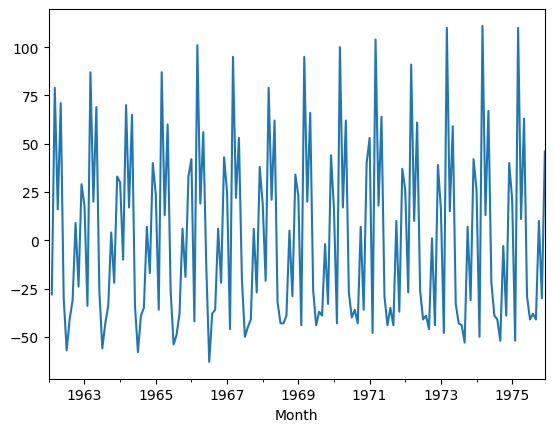

In [24]:
dairy_prod['Milk First Difference'].plot()

In [25]:
adf=adfuller(dairy_prod['Milk First Difference'].dropna())

print(adf)

print('p-value:', adf[1])

(-3.0549955586530992, 0.03006800400178324, 14, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, 1107.6745114331075)
p-value: 0.03006800400178324


So the p-value indicates that this part of the data shows stationarity.

In [26]:
dairy_prod['Seasonal Difference']=dairy_prod['Monthly Milk Production(pounds)']-dairy_prod['Monthly Milk Production(pounds)'].shift(12)

In [27]:
dairy_prod['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

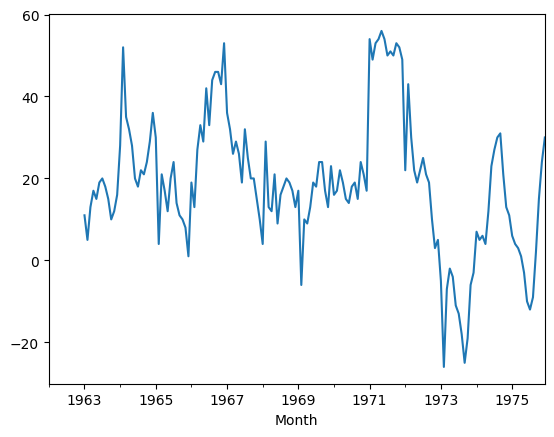

In [28]:
dairy_prod['Seasonal Difference'].plot()

In [29]:
adf=adfuller(dairy_prod['Seasonal Difference'].dropna())

print(adf)

print('p-value:', adf[1])

(-2.3354193143594015, 0.1607988052771125, 12, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 983.7689056486297)
p-value: 0.1607988052771125


This data scores a high p-value which indicates that we can not reject the null hypothesis, which means, data is not stationary.

In [30]:
dairy_prod['Seasonal First Difference']= dairy_prod['Milk First Difference']-dairy_prod['Milk First Difference'].shift(12)

In [31]:
dairy_prod['Seasonal First Difference'].isnull().sum()

13

<Axes: xlabel='Month'>

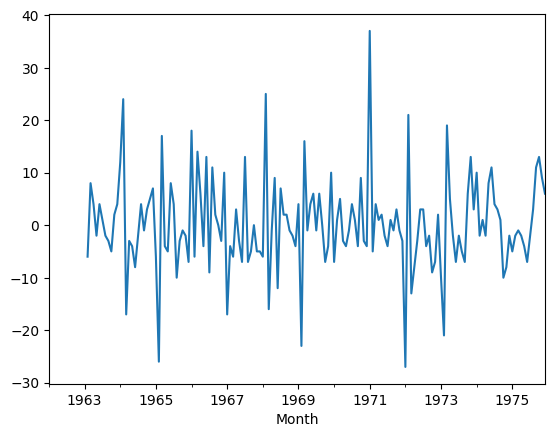

In [32]:
dairy_prod['Seasonal First Difference'].plot()

In [33]:
adf=adfuller(dairy_prod['Seasonal First Difference'].dropna())

print(adf)

print('p-value:', adf[1])

(-5.038002274921981, 1.865423431878848e-05, 11, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 980.3420381538448)
p-value: 1.865423431878848e-05


The p-value score tells us that we can reject our null hypothesis, which means, that the data is now stationary.

Now let's check how our data is correlated.

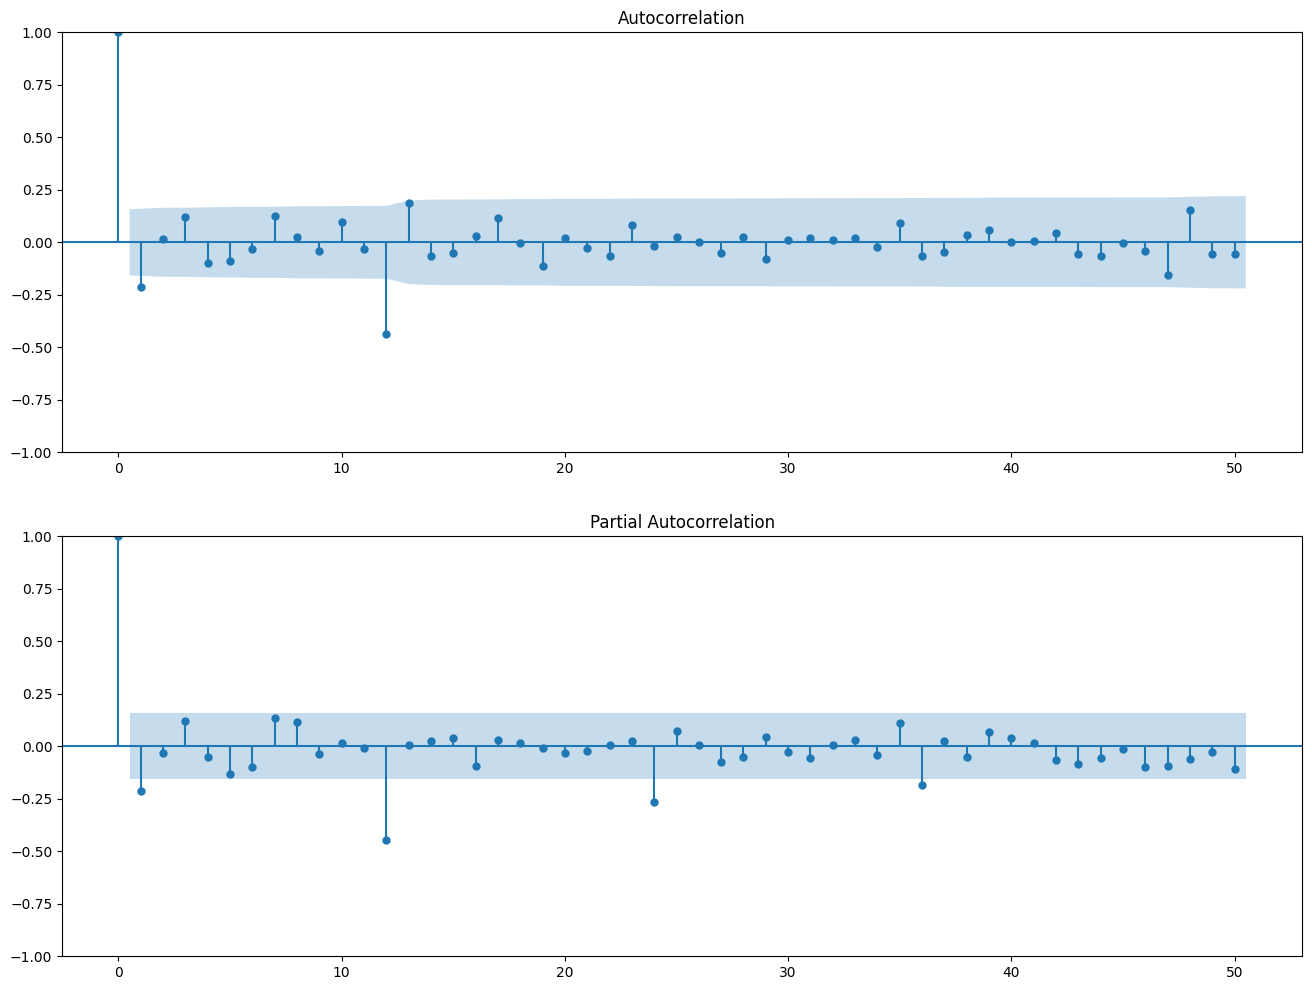

In [34]:
# now we will plot the correlation of the data through ACF and PACF

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dairy_prod['Seasonal First Difference'].iloc[13:], lags=50, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dairy_prod['Seasonal First Difference'].iloc[13:], lags=50, ax=ax2)

Here, we can see the our data is mostly positively correlated.

#Creating Our Model

# SARIMAX

In [35]:
# importing the model lib
from statsmodels.tsa.arima_model import ARIMA

In [36]:
# importing warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import itertools

First we will pick out the best pdq commbination for better accuracy.

In [37]:
start = datetime.strptime('1962-01-01', '%Y-%m-%d')
end = datetime.strptime('1975-12-01', '%Y-%m-%d')

p=d=q=range(0,4)

pdq = list(itertools.product(p,d,q))

print(pdq)

best_aic = np.inf
print(best_aic)

best_pdq = None

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]
inf


In [38]:
for i in pdq:
  model=sm.tsa.ARIMA(dairy_prod['Monthly Milk Production(pounds)'], order=i)
  result = model.fit()

  if result.aic < best_aic:
    best_aic=result.aic
    best_pdq = i
  print(f'ARIMA:{i} - AIC: {result.aic}')

ARIMA:(0, 0, 0) - AIC: 2034.4242833743529
ARIMA:(0, 0, 1) - AIC: 1897.689048681863
ARIMA:(0, 0, 2) - AIC: 1822.0056984613163
ARIMA:(0, 0, 3) - AIC: 1748.5582425594987
ARIMA:(0, 1, 0) - AIC: 1749.73219913295
ARIMA:(0, 1, 1) - AIC: 1751.6713775108865
ARIMA:(0, 1, 2) - AIC: 1728.0471561076104
ARIMA:(0, 1, 3) - AIC: 1715.943137432778
ARIMA:(0, 2, 0) - AIC: 1850.6446597954468
ARIMA:(0, 2, 1) - AIC: 1747.1666599872688
ARIMA:(0, 2, 2) - AIC: 1749.0671223142012
ARIMA:(0, 2, 3) - AIC: 1724.8725763730818
ARIMA:(0, 3, 0) - AIC: 2032.3709827394116
ARIMA:(0, 3, 1) - AIC: 1847.3880343494607
ARIMA:(0, 3, 2) - AIC: 1750.48729805739
ARIMA:(0, 3, 3) - AIC: 1752.316703158253
ARIMA:(1, 0, 0) - AIC: 1757.9850927153075
ARIMA:(1, 0, 1) - AIC: 1759.4129849182382
ARIMA:(1, 0, 2) - AIC: 1728.629020711956
ARIMA:(1, 0, 3) - AIC: 1730.1138100901317
ARIMA:(1, 1, 0) - AIC: 1751.6398579071597
ARIMA:(1, 1, 1) - AIC: 1753.016340674469
ARIMA:(1, 1, 2) - AIC: 1728.3248800482697
ARIMA:(1, 1, 3) - AIC: 1701.432371880066
AR

In [39]:
best_pdq

(3, 1, 2)

In [40]:
best_aic

1627.7471845299451

We will also find the best pdq combination for the seasonal first difference.

In [41]:
start = datetime.strptime('1962-01-01', '%Y-%m-%d')
end = datetime.strptime('1975-12-01', '%Y-%m-%d')

p=d=q=range(0,4)

pdq = list(itertools.product(p,d,q))

print(pdq)

best_seasonal_aic = np.inf
print(best_seasonal_aic)

best_seasonal_pdq = None

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 3, 0), (1, 3, 1), (1, 3, 2), (1, 3, 3), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 3, 0), (2, 3, 1), (2, 3, 2), (2, 3, 3), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 3, 0), (3, 3, 1), (3, 3, 2), (3, 3, 3)]
inf


In [42]:
# now finding pdq combinations for the seasaonal first difference
for i in pdq:
  model=sm.tsa.SARIMAX(dairy_prod['Seasonal First Difference'], order=i)
  result = model.fit()

  if result.aic < best_seasonal_aic:
    best_seasonal_aic=result.aic
    best_seasonal_pdq = i
  print(f'ARIMA:{i} - AIC: {result.aic}')

ARIMA:(0, 0, 0) - AIC: 1119.9685621159506
ARIMA:(0, 0, 1) - AIC: 1114.9937544093145
ARIMA:(0, 0, 2) - AIC: 1116.4260734186614
ARIMA:(0, 0, 3) - AIC: 1117.3549268976371
ARIMA:(0, 1, 0) - AIC: 1265.391987585073
ARIMA:(0, 1, 1) - AIC: 1136.4210593264727
ARIMA:(0, 1, 2) - AIC: 1131.9240150941826
ARIMA:(0, 1, 3) - AIC: 1133.2129482134624
ARIMA:(0, 2, 0) - AIC: 1451.3556088898308
ARIMA:(0, 2, 1) - AIC: 1280.9754000298753
ARIMA:(0, 2, 2) - AIC: 1159.4433516587696
ARIMA:(0, 2, 3) - AIC: 1155.8742419272485
ARIMA:(0, 3, 0) - AIC: 1648.7423089518593
ARIMA:(0, 3, 1) - AIC: 1465.8040694318818
ARIMA:(0, 3, 2) - AIC: 1301.015487326274
ARIMA:(0, 3, 3) - AIC: 1188.9850052560498
ARIMA:(1, 0, 0) - AIC: 1114.843777842995
ARIMA:(1, 0, 1) - AIC: 1116.7627908555364
ARIMA:(1, 0, 2) - AIC: 1118.2434947025931
ARIMA:(1, 0, 3) - AIC: 1112.6534671798074
ARIMA:(1, 1, 0) - AIC: 1200.6919559843327
ARIMA:(1, 1, 1) - AIC: 1131.704493527214
ARIMA:(1, 1, 2) - AIC: 1133.6543406158971
ARIMA:(1, 1, 3) - AIC: 1130.1413212584

In [43]:
best_seasonal_aic

1105.3746804518746

In [44]:
best_seasonal_pdq

(2, 0, 2)

In [46]:
# training our model
model= sm.tsa.statespace.SARIMAX(dairy_prod['Monthly Milk Production(pounds)'], order= (3,1,2), seasonal_order=(2,0,2,12), enforce_stationarity=False)

In [47]:
results=model.fit()

In [48]:
results.aic

973.4528389149664

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     Monthly Milk Production(pounds)   No. Observations:                  168
Model:              SARIMAX(3, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -476.726
Date:                             Wed, 17 Apr 2024   AIC                            973.453
Time:                                     12:38:40   BIC                           1002.869
Sample:                                 01-01-1962   HQIC                           985.407
                                      - 12-01-1975                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6072      0.764     -0.795      0.427      -2.104       0.890
ar.L2          0.2611      0.841      0.311      0.756      -1.387       1.909
ar.L3          0.1707      0.209      0.815      0.415      -0.240       0.581
ma.L1          0.4054      0.799      0.507      0.612      -1.160       1.971
ma.L2         -0.3470      0.704     -0.493      0.622      -1.727       1.033
ar.S.L12       0.2176      0.058      3.772      0.000       0.105       0.331
ar.S.L24       0.7926      0.056     14.113      0.000       0.683       0.903
ma.S.L12       0.3523      1.564      0.225      0.822      -2.714       3.418
ma.S.L24      -0.6322      1.040     -0.608      0.543      -2.671       1.406
sigma2        44.4872     65.339      0.681      0.496     -83.576     172.550
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                60.49
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.75
Prob(H) (two-sided):                  0.87   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

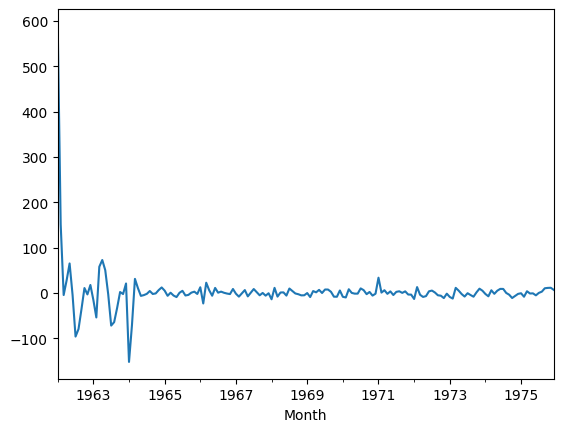

In [50]:
results.resid.plot()

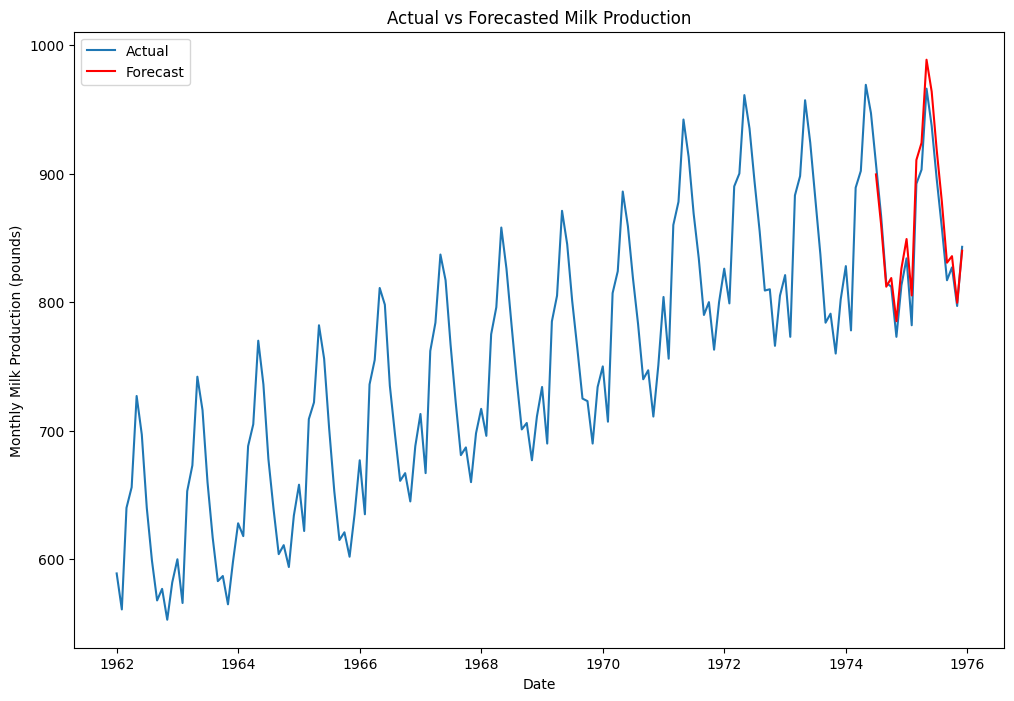

In [51]:
dairy_prod['forecast'] = results.predict(start=150, end=168, dynamic=True)

# Plot the original time series along with the forecast
plt.figure(figsize=(12, 8))
plt.plot(dairy_prod.index, dairy_prod['Monthly Milk Production(pounds)'], label='Actual')
plt.plot(dairy_prod.index[150:], dairy_prod['forecast'][150:], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Monthly Milk Production (pounds)')
plt.title('Actual vs Forecasted Milk Production')
plt.legend()
plt.show()

As we can see here, our model is giving promising results on the predictions.

Now let's predict the production of milk for future.

In [52]:
from pandas.tseries.offsets import DateOffset

In [53]:
future_prod = [dairy_prod.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [54]:
future_prod

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [55]:
future_dates_df = pd.DataFrame(index = future_prod[1:],columns = dairy_prod.columns)

In [56]:
future_df = pd.concat([dairy_prod,future_dates_df])

In [57]:
future_df

,Monthly Milk Production(pounds),Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN
...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

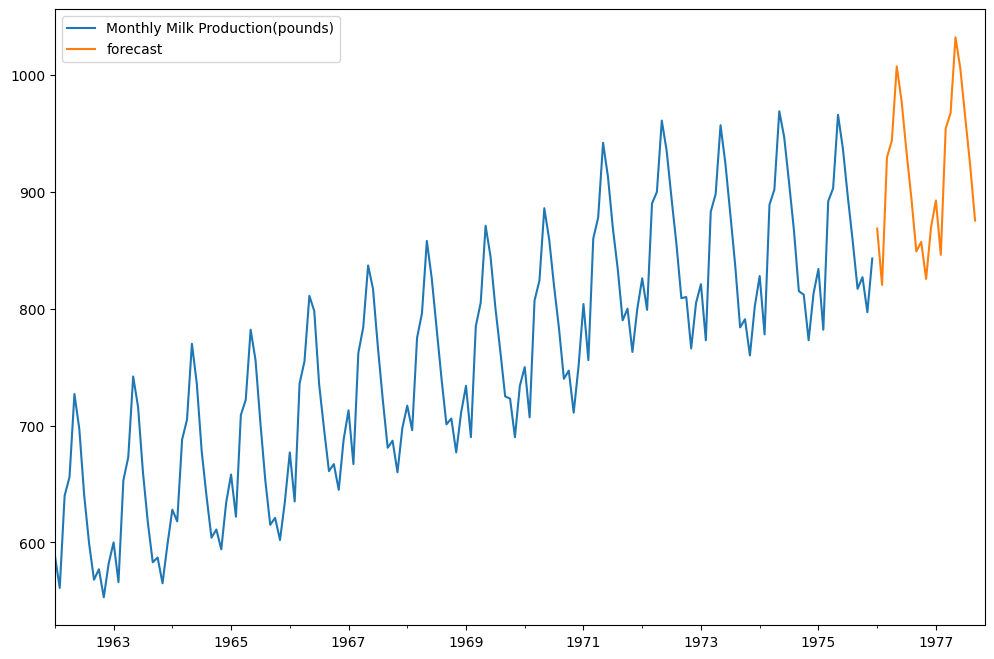

In [58]:
future_df['forecast'] = results.predict(start = 168, end = 188,dynamic= True)
future_df[['Monthly Milk Production(pounds)', 'forecast']].plot(figsize = (12, 8))

The above plot shows the prediction of the milk production for the next year. The results arre good as the production goes higher in the future.

While  creating this model, we faced one two issues.

1. while creating our model our first choice was the ARIMA model for training but the errors couldn't let us train the data with the ARIMA. This was the error which I faced [LinAlgError: LU decomposition error.]. So we removed the code part of the ARIMA from here and went with the SARIMAX.

2. Another issue we went through was in the SARIMAX model. The problem we faced was with the parameters. So, to solve it we went through several articles on the web and found the solution.

Now, at last, we can say that after few issues and several hours of research over the internet. we have successfully  created our time series model that predicts the milk production precisely.